In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
df = pd.read_csv("walmart.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
df.shape

(550068, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


#### Observation:
1) No null values

2) Number of rows = 550068, Number of columns = 10

In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [7]:
df.describe(include = "object")

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [8]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

#### Observation:
1) No null values.

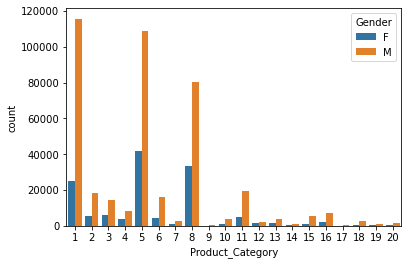

In [162]:
sns.countplot(data = df, x = "Product_Category",hue = "Gender")
plt.show()

#### Observations:
1) Product category 1, 5, 8 are popular than other product categories.

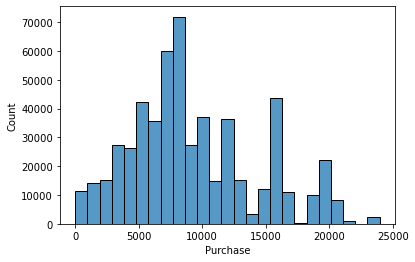

In [55]:
sns.histplot(data = df, x = "Purchase", bins = 25)
plt.show()

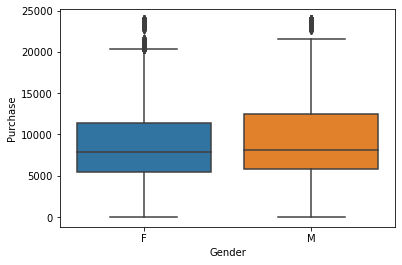

In [9]:
sns.boxplot(data = df, y = "Purchase", x = "Gender")
plt.show()

In [76]:
df.groupby(by = "Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


### Observations:
1) No major difference in median purchase amount between male and female 

In [150]:
df["Stay_In_Current_City_Years"].value_counts(normalize = True)

1     0.352358
2     0.185137
3     0.173224
4+    0.154028
0     0.135252
Name: Stay_In_Current_City_Years, dtype: float64

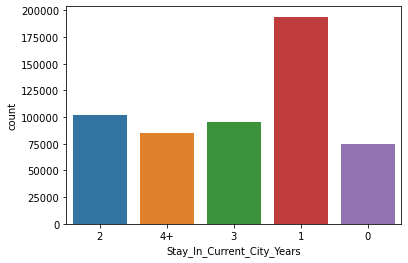

In [12]:
sns.countplot(data = df, x ="Stay_In_Current_City_Years")
plt.show()

### Observations:
1) 35% of customers are staying in their current cities from past 1 year.


In [24]:
df["Gender"].value_counts(normalize = True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

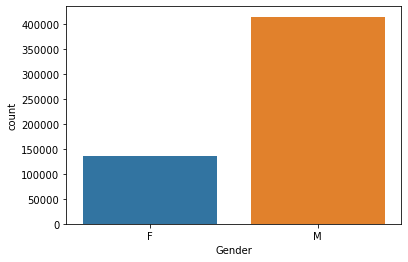

In [13]:
sns.countplot(data = df, x = "Gender")
plt.show()

### Observations:
1) male orders = 75%, Female orders = 25%

In [152]:
df["Age"].value_counts(normalize = True)*100

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

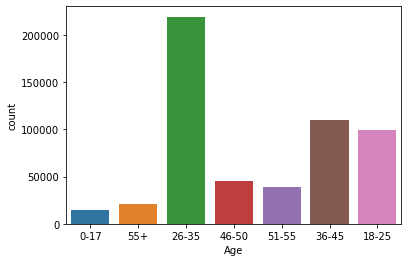

In [18]:
sns.countplot(data = df, x = "Age")
plt.show()

### Observations:
1) 78% of the people who purchased on black friday are in the age group of 18-45

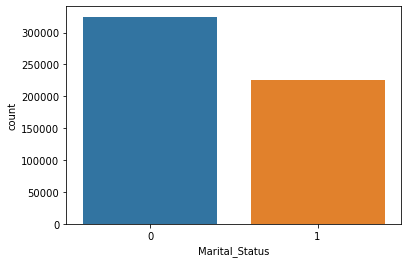

In [58]:
sns.countplot(data = df, x = "Marital_Status")
plt.show() 

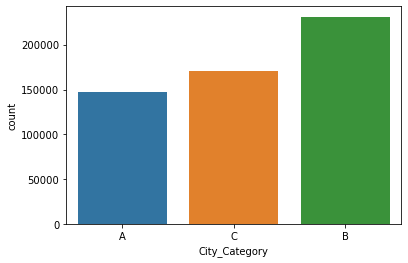

In [60]:
sns.countplot(data = df, x = "City_Category")
plt.show() 

### Customer purchase behavior against the customer’s gender

In [122]:
df.groupby(by = "Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [72]:
# Bootstraping
sample_size = 300
no_of_samples = 1000
male_sample_means = [df[df["Gender"]=="M"]["Purchase"].sample(sample_size, replace = True).mean() for i in range(no_of_samples)]
female_sample_means = [df[df["Gender"]=="F"]["Purchase"].sample(sample_size, replace = True).mean() for i in range(no_of_samples)]

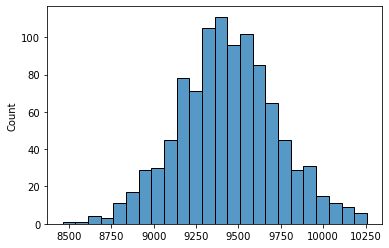

In [73]:
sns.histplot(male_sample_means)
plt.show()

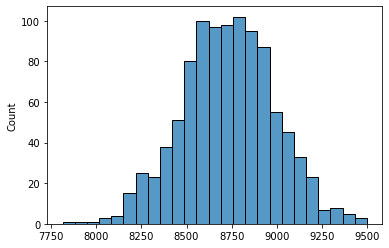

In [74]:
sns.histplot(female_sample_means)
plt.show()

In [79]:
mu_male = np.mean(male_sample_means)
std_male = np.std(male_sample_means)

mu_female = np.mean(female_sample_means)
std_female = np.std(female_sample_means)

In [80]:
# 95th Confidence Interval for male:
(mu_male - 1.95 *  std_male , mu_male + 1.95 *  std_male )

(8865.375550957968, 10008.01566904203)

In [81]:
# 95th Confidence Interval for female:
(mu_female - 1.95 *  std_female , mu_female + 1.95 *  std_female )

(8228.568976106875, 9231.978963893122)

#### Observations:
1) 95th Confidence intervals for male and female are overlapping , so we can not make any conclusion about there purchase behavior.

### Customer purchase behavior against the customer’s City_Category

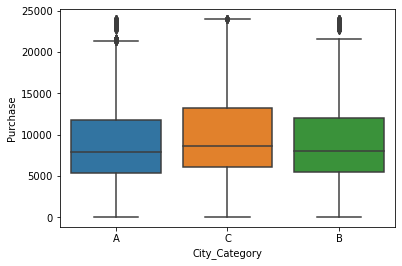

In [153]:
sns.boxplot(data = df, y = "Purchase", x = "City_Category")
plt.show()

In [103]:
df.groupby(by = "City_Category")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


In [99]:
# Bootstraping
sample_size = 300
no_of_samples = 500
A_city_sample_means = [df[df["City_Category"]=="A"]["Purchase"].sample(sample_size, replace = True).mean() for i in range(no_of_samples)]
B_city_sample_means = [df[df["City_Category"]=="B"]["Purchase"].sample(sample_size, replace = True).mean() for i in range(no_of_samples)]
C_city_sample_means = [df[df["City_Category"]=="C"]["Purchase"].sample(sample_size, replace = True).mean() for i in range(no_of_samples)]

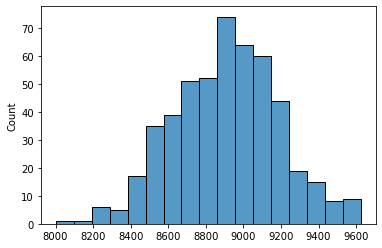

In [100]:
sns.histplot(A_city_sample_means)
plt.show()

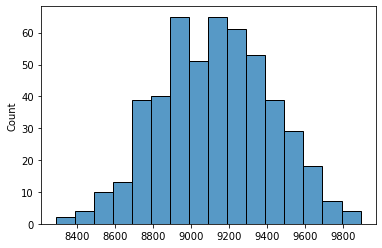

In [101]:
sns.histplot(B_city_sample_means)
plt.show()

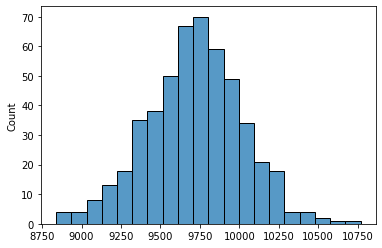

In [102]:
sns.histplot(C_city_sample_means)
plt.show()

In [111]:
mu_A = np.mean(A_city_sample_means)
std_A = np.std(A_city_sample_means)

mu_B = np.mean(B_city_sample_means)
std_B = np.std(B_city_sample_means)

mu_C = np.mean(C_city_sample_means)
std_C = np.std(C_city_sample_means)

In [112]:
# 95th Confidence Interval for city A:
(mu_A - 1.95 * std_A , mu_A + 1.95 * std_A )

(8366.068802953821, 9450.059383712847)

In [113]:
# 95th Confidence Interval for city B:
(mu_B - 1.95 * std_B , mu_B + 1.95 * std_B )

(8559.200679630176, 9703.05633370316)

In [114]:
# 95th Confidence Interval for city C:
(mu_C - 1.95 * std_C , mu_C + 1.95 * std_C )

(9124.586458266884, 10310.869155066448)

#### Observations:
1) 95th Confidence intervals for city category A, B, C are overlapping , so we can not make any conclusion about there purchase behavior.

### Customer purchase behavior against the customer’s Marital_Status:	

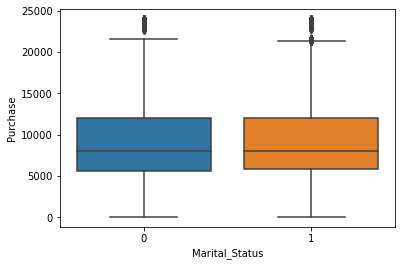

In [154]:
sns.boxplot(data = df, y = "Purchase", x = "Marital_Status")
plt.show()

In [124]:
df.groupby(by = "Marital_Status")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [125]:
# Bootstraping
sample_size = 300
no_of_samples = 300
ms0_sample_means = [df[df["Marital_Status"]==0]["Purchase"].sample(sample_size, replace = True).mean() for i in range(no_of_samples)]
ms1_sample_means = [df[df["Marital_Status"]==1]["Purchase"].sample(sample_size, replace = True).mean() for i in range(no_of_samples)]


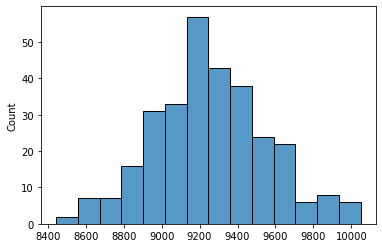

In [126]:
sns.histplot(ms0_sample_means)
plt.show()

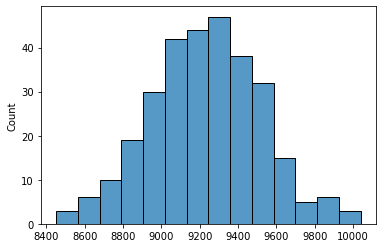

In [127]:
sns.histplot(ms1_sample_means)
plt.show()

In [128]:
mu_ms0 = np.mean(ms0_sample_means)
std_ms0 = np.std(ms0_sample_means)

mu_ms1 = np.mean(ms1_sample_means)
std_ms1 = np.std(ms1_sample_means)

In [131]:
# 95th Confidence Interval for Marital_Status 0:
(mu_ms0 - 1.95 * std_ms0 , mu_ms0 + 1.95 * std_ms0 )

(8661.61063309677, 9846.760922458787)

In [130]:
# 95th Confidence Interval for Marital_Status 1:
(mu_ms1 - 1.95 * std_ms1 , mu_ms1 + 1.95 * std_ms1 )

(8671.620781027128, 9787.872063417317)

#### Observations:
1) 95th Confidence intervals for Marital status 0 and 1 are overlapping , so we can not make any conclusion about there purchase behavior.

### Customer purchase behavior against the customer’s Age:

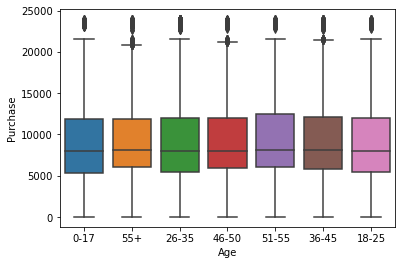

In [155]:
sns.boxplot(data = df, y = "Purchase", x = "Age")
plt.show()

In [132]:
df.groupby(by = "Age")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [134]:
# Bootstraping
sample_size = 300
no_of_samples = 300
age_0_17_sample_means = [df[df["Age"]=="0-17"]["Purchase"].sample(sample_size, replace = True).mean() for i in range(no_of_samples)]
age_18_25_sample_means = [df[df["Age"]=="18-25"]["Purchase"].sample(sample_size, replace = True).mean() for i in range(no_of_samples)]
age_26_35_sample_means = [df[df["Age"]=="26-35"]["Purchase"].sample(sample_size, replace = True).mean() for i in range(no_of_samples)]
age_36_45_sample_means = [df[df["Age"]=="36-45"]["Purchase"].sample(sample_size, replace = True).mean() for i in range(no_of_samples)]
age_46_50_sample_means = [df[df["Age"]=="46-50"]["Purchase"].sample(sample_size, replace = True).mean() for i in range(no_of_samples)]
age_51_55_sample_means = [df[df["Age"]=="51-55"]["Purchase"].sample(sample_size, replace = True).mean() for i in range(no_of_samples)]
age_55plus_sample_means = [df[df["Age"]=="55+"]["Purchase"].sample(sample_size, replace = True).mean() for i in range(no_of_samples)]



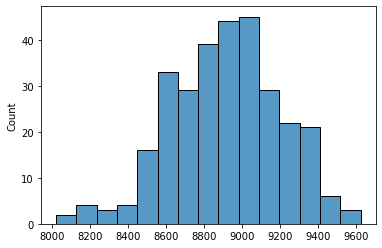

In [135]:
sns.histplot(age_0_17_sample_means)
plt.show()

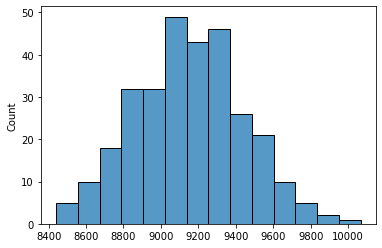

In [136]:
sns.histplot(age_18_25_sample_means)
plt.show()

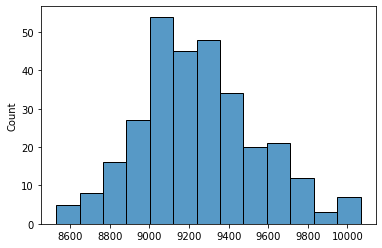

In [137]:
sns.histplot(age_26_35_sample_means)
plt.show()

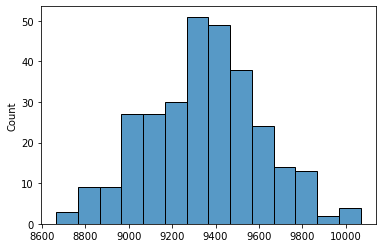

In [138]:
sns.histplot(age_36_45_sample_means)
plt.show()

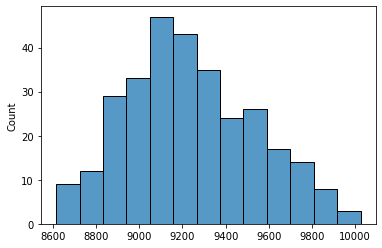

In [139]:
sns.histplot(age_46_50_sample_means)
plt.show()

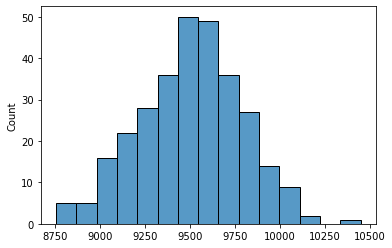

In [140]:
sns.histplot(age_51_55_sample_means)
plt.show()

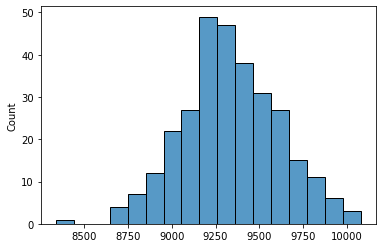

In [141]:
sns.histplot(age_55plus_sample_means)
plt.show()

In [142]:
mu_age_0_17 = np.mean(age_0_17_sample_means)
std_age_0_17 = np.std(age_0_17_sample_means)

mu_age_18_25 = np.mean(age_18_25_sample_means)
std_age_18_25 = np.std(age_18_25_sample_means)

mu_age_26_35 = np.mean(age_26_35_sample_means)
std_age_26_35 = np.std(age_26_35_sample_means)

mu_age_36_45 = np.mean(age_36_45_sample_means)
std_age_36_45 = np.std(age_36_45_sample_means)

mu_age_46_50 = np.mean(age_46_50_sample_means)
std_age_46_50 = np.std(age_46_50_sample_means)

mu_age_51_55 = np.mean(age_51_55_sample_means)
std_age_51_55 = np.std(age_51_55_sample_means)

mu_age_55plus = np.mean(age_55plus_sample_means)
std_age_55plus = np.std(age_55plus_sample_means)



In [143]:
# 95th Confidence Interval for Age group 0_17:
(mu_age_0_17 - 1.95 * std_age_0_17 , mu_age_0_17 + 1.95 * std_age_0_17 )

(8361.492412792033, 9474.151764985747)

In [144]:
# 95th Confidence Interval for Age group 18_25:
(mu_age_18_25 - 1.95 * std_age_18_25 , mu_age_18_25 + 1.95 * std_age_18_25 )

(8586.495267320517, 9714.502021568374)

In [145]:
# 95th Confidence Interval for Age group 26_35:
(mu_age_26_35 - 1.95 * std_age_26_35 , mu_age_26_35 + 1.95 * std_age_26_35)

(8657.19866971871, 9835.391196947956)

In [146]:
# 95th Confidence Interval for Age group 36_45:
(mu_age_36_45 - 1.95 * std_age_36_45 , mu_age_36_45 + 1.95 * std_age_36_45 )

(8833.393229981799, 9857.286836684865)

In [147]:
# 95th Confidence Interval for Age group 46_50:
(mu_age_46_50 - 1.95 * std_age_46_50 , mu_age_46_50 + 1.95 * std_age_46_50 )

(8666.855996961807, 9814.014847482638)

In [148]:
# 95th Confidence Interval for Age group 51_55:
(mu_age_51_55 - 1.95 * std_age_51_55 , mu_age_51_55 + 1.95 * std_age_51_55 )

(8954.971488029532, 10058.478045303804)

In [149]:
# 95th Confidence Interval for Age group 55+:
(mu_age_55plus - 1.95 * std_age_55plus , mu_age_55plus + 1.95 * std_age_55plus )

(8791.727544981119, 9878.170566129995)

#### Observations:
1) 95th Confidence intervals for various Age groups are overlapping , so we can not make any conclusion about there purchase behavior.

### Recommendations:
1) Product category 1, 5, 8 are popular than other product categories. Management should focus on other product categories to increase their sale.

2) Male orders are 75%, management should find ways to attract more females.

3) Focus on kids , they are very less in numbers.
